#OBJECTIVE

**PROBLEM STATEMENT** - Uber has received some complaints from their customers facing problems related to ride cancellations by the driver and non-availability of cars for a specic route in the city.


The main moto of solving this case-study is to identify why UBER has faced a downfall in its booking rate.

Meanwhile, this problem has been solved by applying root cause analysis using data visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!gdown 1ZhqCqM5xtMNsun-xBhfvtrYH2RlM1Ue5

Downloading...
From: https://drive.google.com/uc?id=1ZhqCqM5xtMNsun-xBhfvtrYH2RlM1Ue5
To: /content/uber-data.csv
100% 395k/395k [00:00<00:00, 110MB/s]


In [37]:
data= pd.read_csv('uber-data.csv')
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


To solve the problem below is the list of questions which will enable us to understand the pattern.

1. Frequency of cancellation.
2. Drop vs Pickup points of cancelled requests.
3. Day/Week where cancellation was mostly observed.
4. Time of the day when cancellation was at peak.
5. Time of the day when demand was highest and cancellation was low.
6. Time of the day when demand was low and cabs were available.

#Feature Engineering

This step is essential in order to get accurate dataset.

In [38]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [39]:
data.shape

(6745, 6)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [41]:
df = data.copy(deep = True)

In [42]:
df['Request timestamp1']=pd.to_datetime(df['Request timestamp'],
                                        format='%d/%m/%Y %H:%M',
                                        errors='coerce')
df['Request timestamp2']=pd.to_datetime(df['Request timestamp'],
                                        format='%d-%m-%Y %H:%M:%S',
                                        errors='coerce')
df['Request timestamp']=df['Request timestamp2'].combine_first(df['Request timestamp1'])


df['Drop timestamp1']=pd.to_datetime(df['Drop timestamp'],
                                        format='%d/%m/%Y %H:%M',
                                        errors='coerce')
df['Drop timestamp2']=pd.to_datetime(df['Drop timestamp'],
                                        format='%d-%m-%Y %H:%M:%S',
                                        errors='coerce')
df['Drop timestamp']=df['Drop timestamp2'].combine_first(df['Drop timestamp1'])

df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp1,Request timestamp2,Drop timestamp1,Drop timestamp2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11 11:51:00,NaT,2016-07-11 13:00:00,NaT
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11 17:57:00,NaT,2016-07-11 18:47:00,NaT
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12 09:17:00,NaT,2016-07-12 09:58:00,NaT
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12 21:08:00,NaT,2016-07-12 22:03:00,NaT
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,NaT,2016-07-13 08:33:16,NaT,2016-07-13 09:25:47
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,NaT,2016-07-15 23:49:03,NaT,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,NaT,2016-07-15 23:50:05,NaT,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,NaT,2016-07-15 23:52:06,NaT,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,NaT,2016-07-15 23:54:39,NaT,NaT


In [43]:
## drop all the unnecesary columns
df.drop(columns=['Drop timestamp1',
                 'Drop timestamp2',
                 'Request timestamp1',
                 'Request timestamp2',
                 ], inplace=True)


In [45]:
#checking null values by percentage
df.isnull().sum()/len(df)*100


,0
Request id,0.000000
Pickup point,0.000000
Driver id,39.288362
Status,0.000000
Request timestamp,0.000000
Drop timestamp,58.028169


In [47]:
#Now identifying that if this  these null values are actually required or we need to drop them off:
#we can see the drop and driver_id are facing nulls. Okay, so lets understand what does null_driver_id denotes - may be no driver shown for the ride
#similarly, drop_timestamp_null may be denoting that - completed/canceled

#to idendity the above we can directly focus on status feature.

df['Status'].value_counts()/len(df)*100

,count
Status,
Trip Completed,41.971831
No Cars Available,39.288362
Cancelled,18.739807


Now, we can see that

1. Driver id	39.288362 = No Cars Available	39.288362 (which means that driver_id is null because no cabs were available).

2. Drop timestamp	58.028169 = Trip COmpleted + Cancelled (41+18).


From these analysis we can observe that the presence of null values actually denotes that the dataset is accurate.

In [51]:
#Feature Engineering
#now to understand in depth we can actually add new columns/features to make our dataset more valuable.
df['Request Hour'] = df['Request timestamp'].dt.hour #This is need as we are targeting which time of the day car was avaliable or demand was low or vice-versa.
df['Timeslot'] = df['Request Hour'].apply(lambda x:
                                          'noon' if x == 12 else
                                          'afternoon' if x > 12 and x < 16 else
                                          'morning' if x< 12 else
                                          'evening' if x>16 and x<20 else
                                          'night')
df['cabs_avaliable'] = df['Status'].apply(lambda x:
                                          'Available' if x=='Trip Completed' else
                                          'Not Available')


In [52]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Timeslot,cabs_avaliable
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,morning,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,morning,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,night,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,morning,Available


<Axes: ylabel='count'>

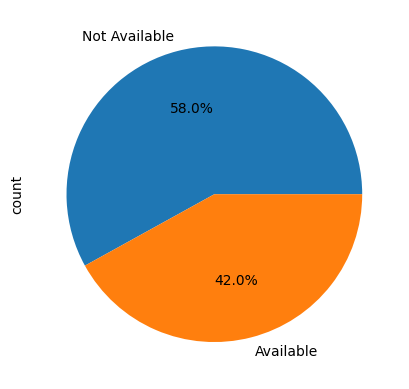

In [57]:
#Analysis

#Percentage of time cabs were available?

availability_check = df['cabs_avaliable'].value_counts()/len(df)*100
availability_check.plot(kind='pie', autopct='%1.1f%%')

Text(0.5, 1.0, 'Frequecy')

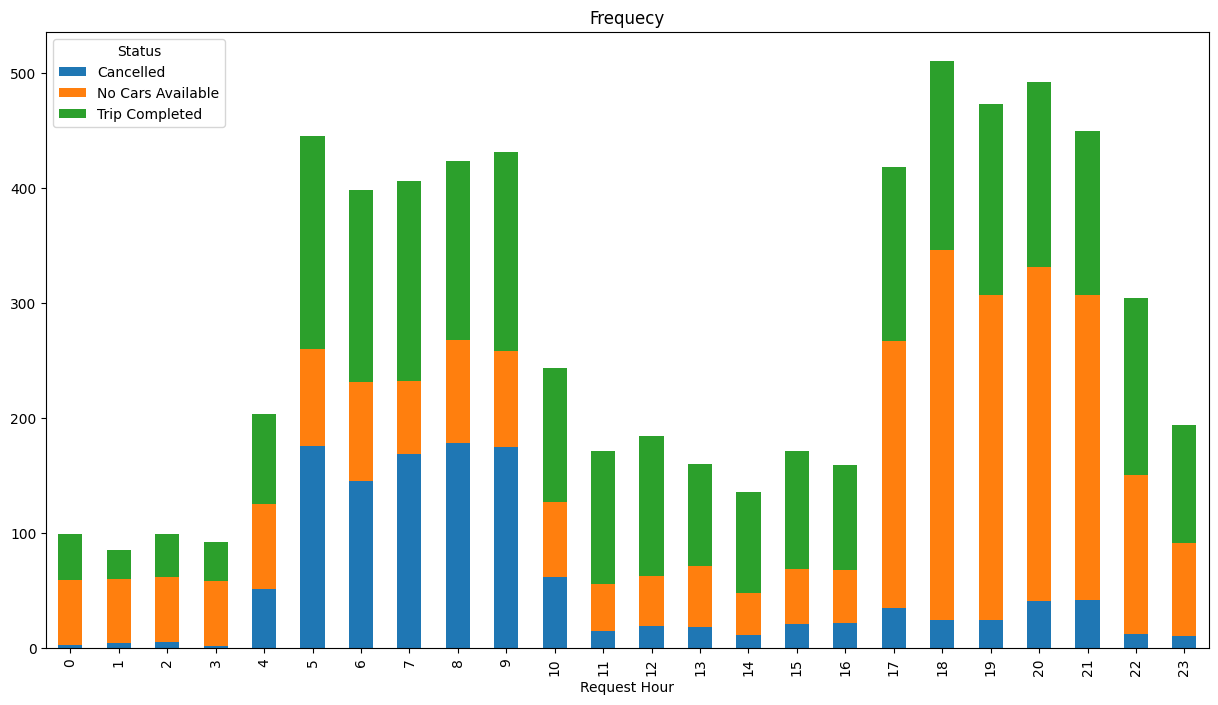

In [69]:
#Frequency Check
df.groupby(['Request Hour','Status']).size()
df.groupby(['Request Hour', 'Status']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,8))
plt.title('Frequecy')

Text(0.5, 1.0, 'Frequecy of Request based on Pickup Points')

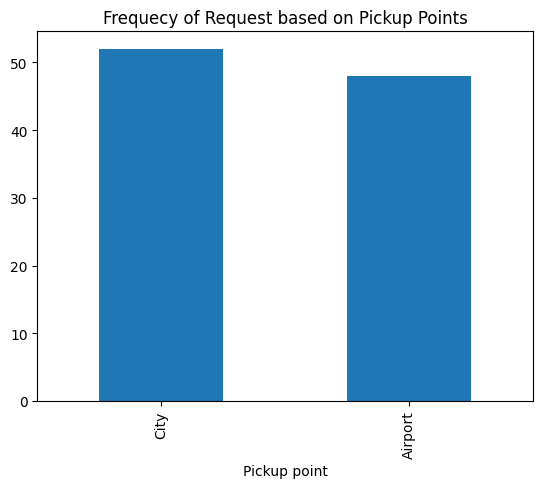

In [68]:
#Lets see how many trips were for airport and city

pickup_check = df['Pickup point'].value_counts()/len(df)*100
pickup_check.plot(kind='bar')
plt.title("Frequecy of Request based on Pickup Points")

Text(0.5, 1.0, 'Frequency of Requests by Timeslot')

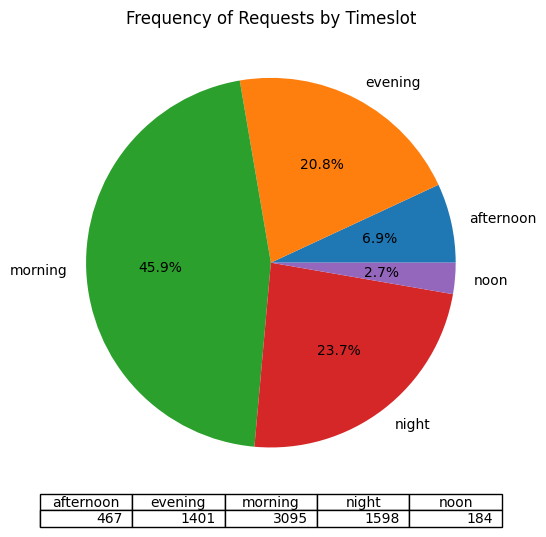

In [73]:
### timeslot rides
df.groupby(['Timeslot']).size().plot(kind='pie',stacked=True,figsize=(6,6),table=True,  autopct='%1.1f%%')
plt.title('Frequency of Requests by Timeslot')
## highest volume in morning followed by night

Text(0.5, 1.0, 'Demand and supply gapr from airport to city')

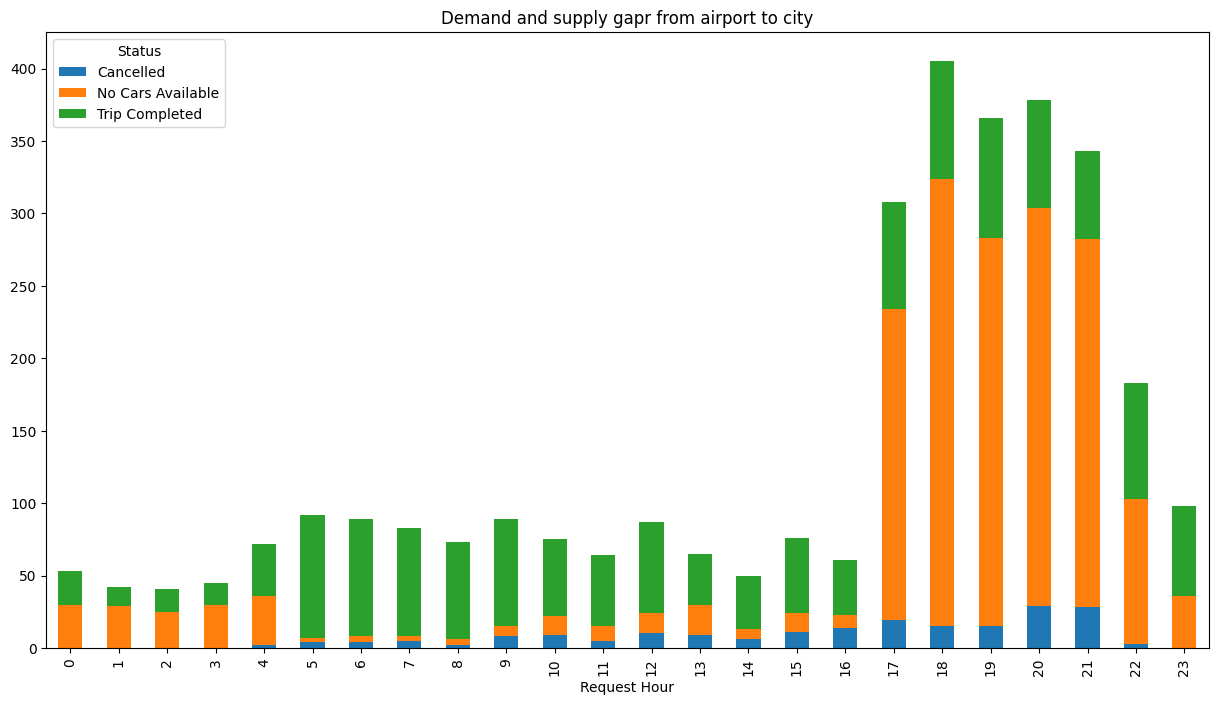

In [75]:
#Now we can do a route wise check
#such as on which route the cancellation was observed the most and during which hour/time.

df[df['Pickup point']=='Airport'].groupby(['Request Hour','Status']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,8))
plt.title('Demand and supply gapr from airport to city')


We can see that the first issue with downfall of uber is during the evening hours demand is most but cabs are not available.

Text(0.5, 1.0, 'Demand and supply gapr from city to airport')

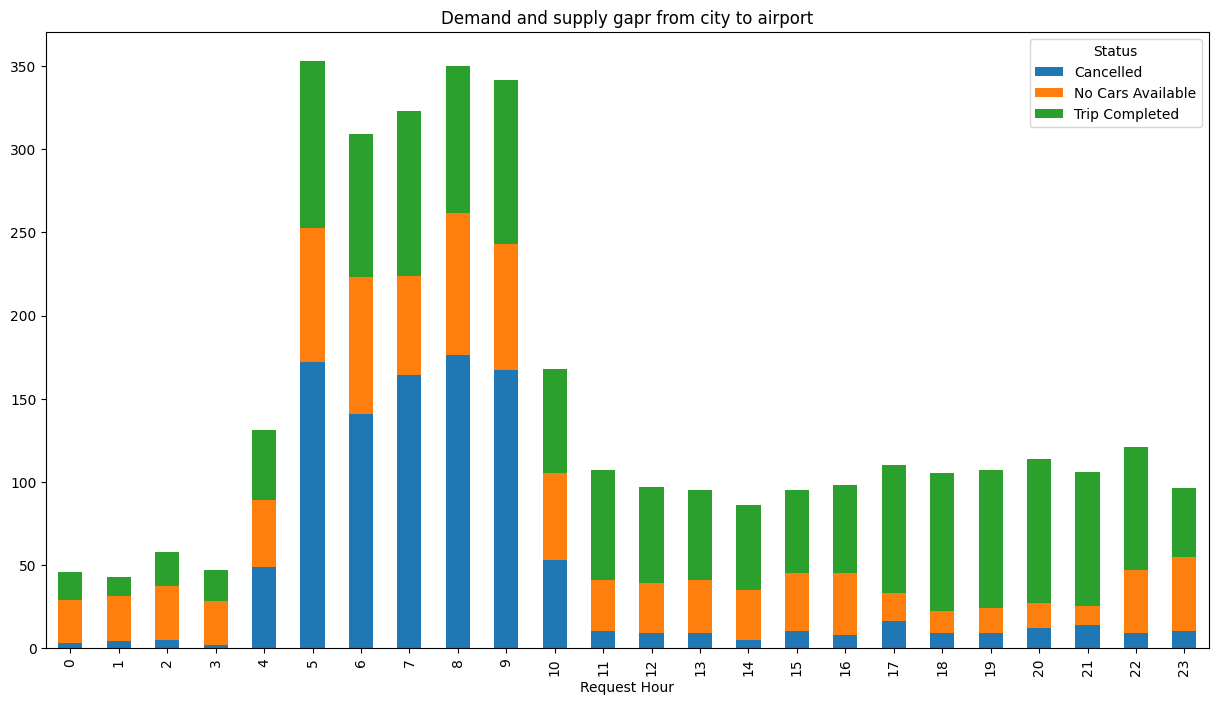

In [76]:
#Now checking for second route

df[df['Pickup point']=='City'].groupby(['Request Hour','Status']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,8))
plt.title('Demand and supply gapr from city to airport')

Here we can see that during moring hours between 5-9 demand is more from city but a lot of cancellation is happening.

In [ ]:
#as of now what we identified.
#from airtport to city - late eveing cabs are not available
#from city to airport - early morning cabs are getting cancelled.

In [77]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Timeslot,cabs_avaliable
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,morning,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,morning,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,night,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,morning,Available


<Axes: xlabel='Timeslot'>

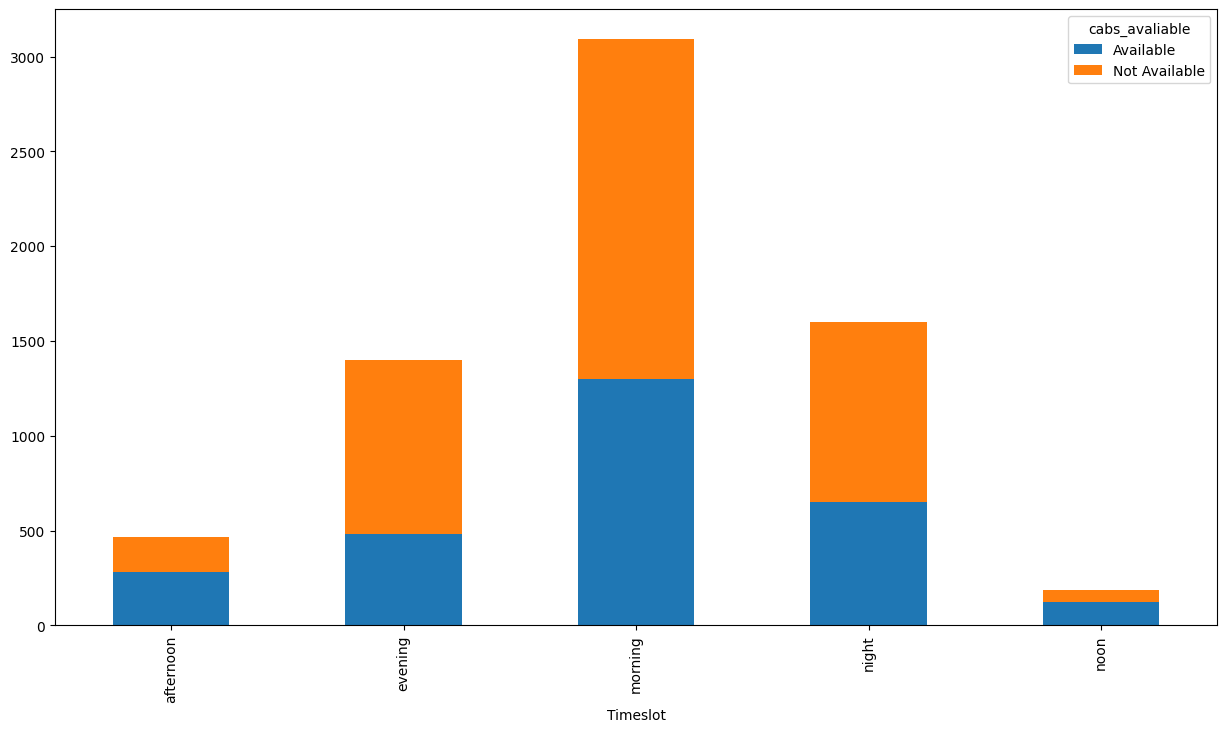

In [78]:
#So we have two things now evening vs morning.
#For this we can do a small comparison to check which time of the face experience highest gap.
df.groupby(['Timeslot','cabs_avaliable']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 8))

From the above analysis it is observed that during the morning hours the demand supply gap is highest.

Text(0.5, 1.0, 'Demand and Supply Gap in the morning routes')

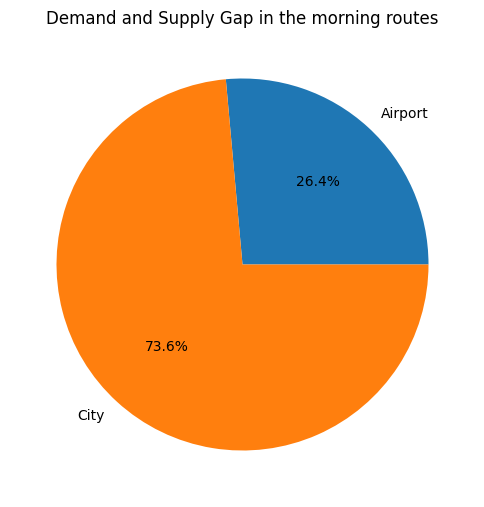

In [85]:
#Diving 1 step in depth to understand which route type experiences the most gap in morning.
morning_gaps = df[df['Timeslot']=='morning']
morning_gaps.groupby(['Pickup point']).size().plot(kind='pie', stacked=True,figsize=(6, 8), autopct ='%1.1f%%')
plt.title('Demand and Supply Gap in the morning routes')

#Conclusion

From the above analysis and by performing a root cause analysis. It was observed that 42% of time cabs were available while 58% time cabs were not available.

Then we identified that which timeslot is experiencing the highest gap. The result was from city to airport the cancellation rate was at peak.

Further, we have also identified that during early-morning, cabs we getting cancelled from city to airport route, while during late eveings no cabs were available for city from airport.

Thus, the company can channelize its operations in a way that atleast availability of cabs at airport during evening can grow which will reduce the loss in its revenue due to higher cancellation.